In [6]:
# install.packages('igraph', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/Ashlesh B Shetty/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashlesh B Shetty\AppData\Local\Temp\RtmpiQDDo2\downloaded_packages


# Problem 1

Warning message in if (axes) {:
"the condition has length > 1 and only the first element will be used"

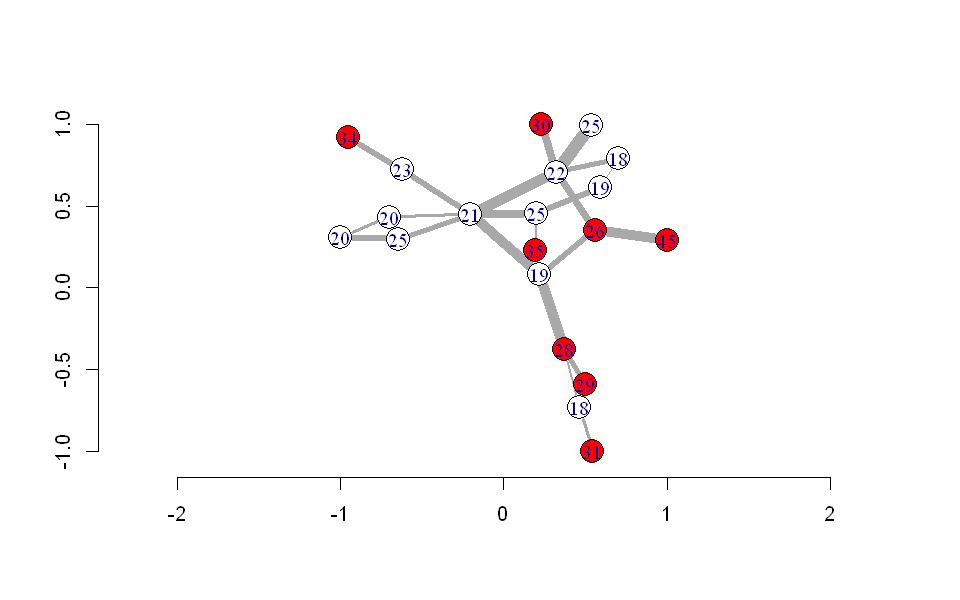

In [12]:
#install.packages("igraph")
library(igraph) 
library(repr)
options(repr.plot.width=8, repr.plot.height=5)
#Use gamers.csv and gamers-age.csv files

#Create edge and vertices data frames from the file data

edges.df<- read.csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\SpringSemester\\MAHFDM\\week7\\gamers.csv')
vert.df <- read.csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\SpringSemester\\MAHFDM\\week7\\gamers-age.csv')

#Read from data frame into graph object
g<- graph_from_data_frame(d=edges.df, vertices = vert.df,directed = FALSE)

#Set edge and vertex attributes
g<- set_vertex_attr(g,"age",value = vert.df$age)
g<- set_edge_attr(g,"hours",value = edges.df$hours)

#Change the color of the vertices that are above the median age to red
V(g)$color <- ifelse(V(g)$age > median(vert.df$age),"red","white")
#Plot the network graph with ages as vertex labels and edge thickness proportional
#to the hours of game played together
plot(g, layout_nicely(g), vertex.label = V(g)$age, edge.width = E(g)$hours)

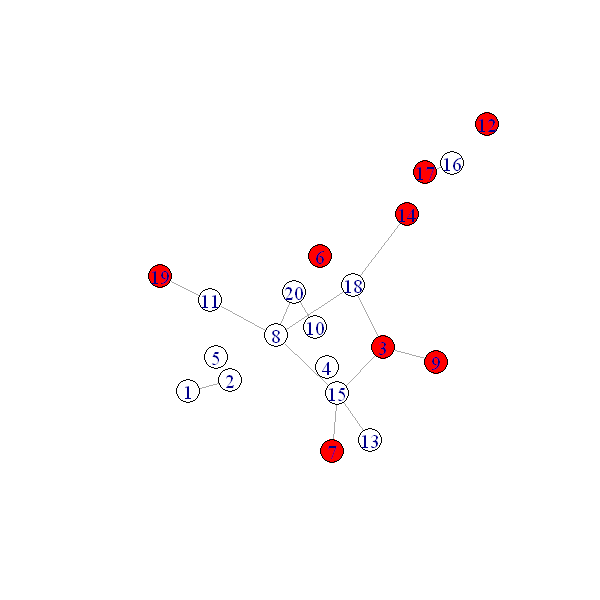

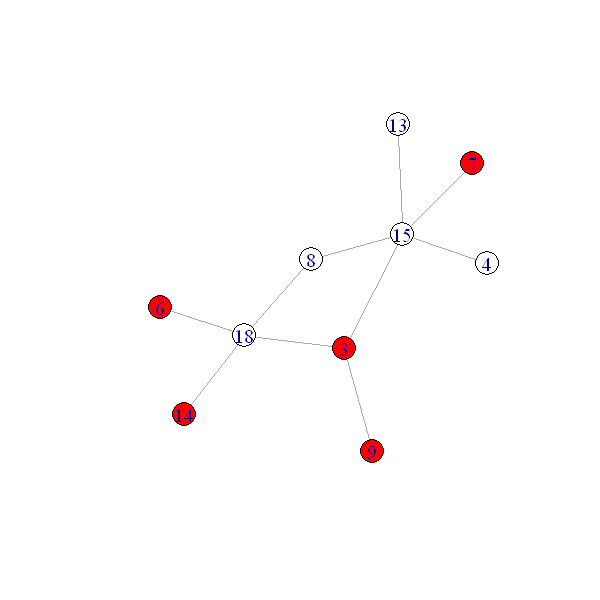

In [18]:
#Delete all edges from the graph in which players are playing for less than
#5 hours together
library(repr)
options(repr.plot.width=5, repr.plot.height=5)
g1 <- delete_edges(g, E(g)[hours<5])
plot(g1,layout = layout_nicely(g))
#Make an ego graph of vertex 3 for all the vertices that can be reached in 2 hops
g2 <-  make_ego_graph(g,2,'3',mode=c('all'))
plot(g2[[1]])

# Problem2

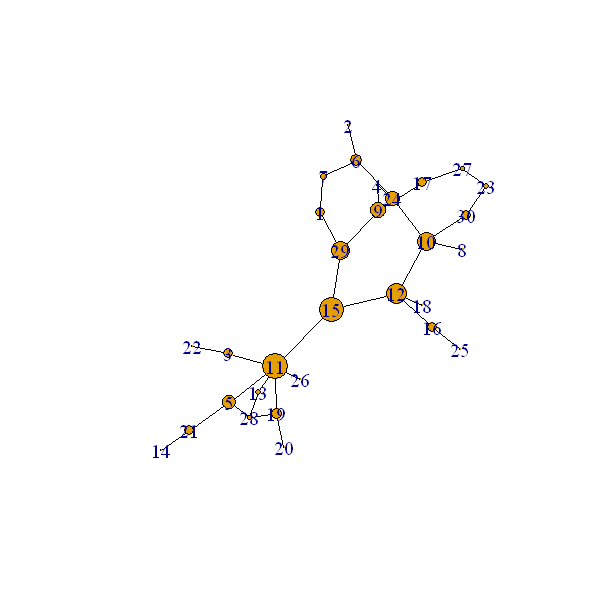

In [20]:
#Part 1: Use club.csv file to read data
club <- read.csv("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\SpringSemester\\MAHFDM\\week7\\club.csv")
g <- graph.edgelist(as.matrix(club),directed = FALSE)

#Compute Betweenness scores for the nodes
g.b <- betweenness(g,directed = FALSE)

#Plot the graph with the vertex size being proportional to the betweenness scores
plot(g, edge.color = 'black',layout = layout_nicely(g), vertex.size = sqrt(g.b)+1)

[1] 11

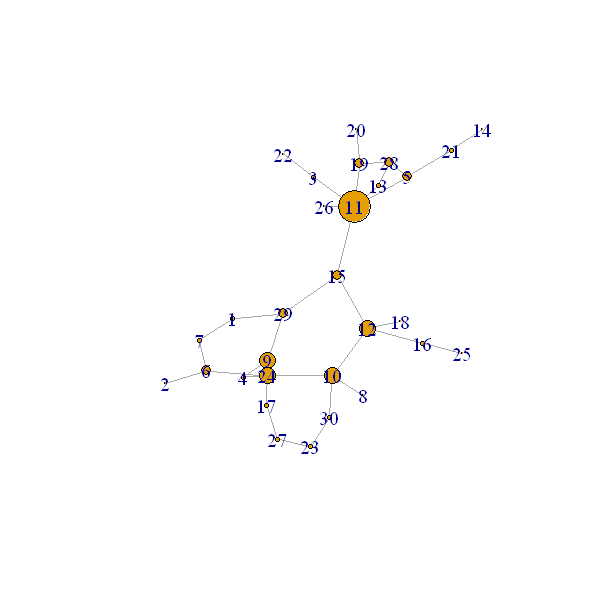

In [21]:
#Find out which node/vertex has the highest betweenness score
which.max(g.b)

#Part 2: Compute Degree centrality of all nodes
g.d <- degree(g,mode=c('all'))

#Plot the graph with the vertex size being proportional to the degree centrality score
plot(g, vertex.size = g.d^1.7)

[1] 11

Community sizes
 1  2  3  4 
 9 11  5  5 

 [1] 1 1 2 1 2 1 1 3 1 3 2 4 2 2 4 4 1 4 2 2 2 2 3 1 4 2 3 2 1 3

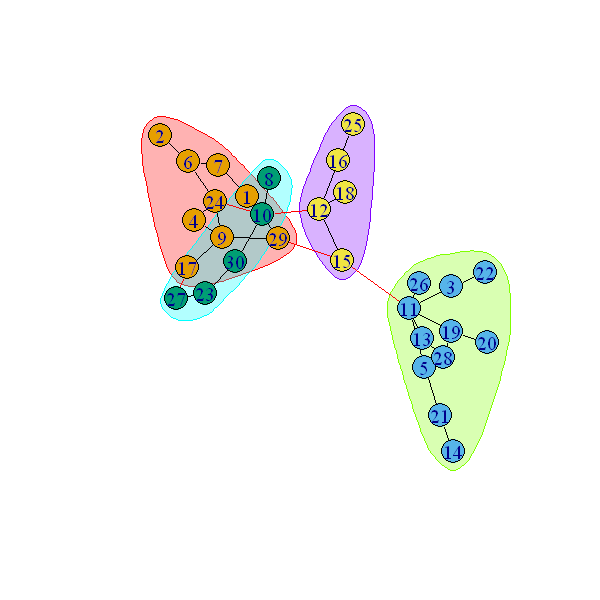

In [22]:
#Which node has the highest degree centrality score?
which.max(g.d)

#Part 3: Use edge betweenness for community detection
x <- edge.betweenness.community(g)

#Plot the communities
plot(x,g)

#Find the community sizes
sizes(x)
membership(x)

# Randomization Test

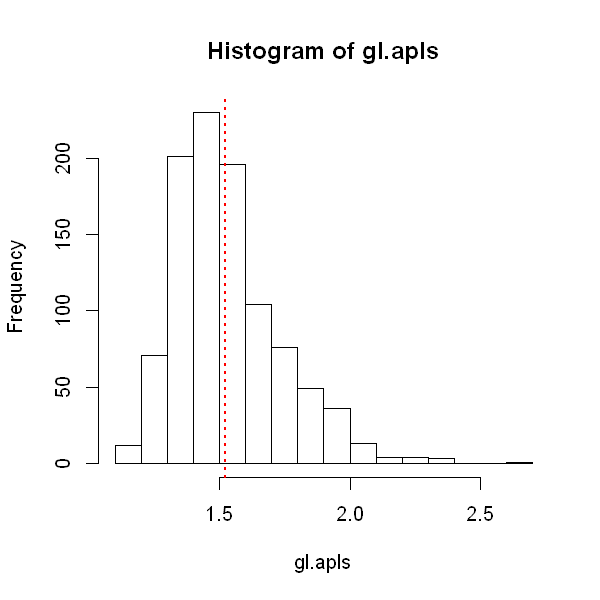

In [23]:
x1=c("A","A","A","A","A","E", "F", "B", "C", "F", "D")
x2=c("B","C","D","E","F","F","G", "E", "G", "D", "C")
df=data.frame(x1,x2)
g<-graph.edgelist(as.matrix(df),directed = FALSE)
gl <- vector('list',1000) # Generate 1000 random graphs
for(i in 1:1000){
gl[[i]] <- erdos.renyi.game(
n = gorder(g),
p.or.m = edge_density(g),
type = "gnp"
)
}
gl.apls <- unlist( lapply(gl, mean_distance, directed = FALSE) )
hist(gl.apls, breaks = 20)
abline(v = mean_distance(g, directed=FALSE), col = "red", lty = 3,
lwd=2)

# Problem 3

In [28]:
#Read from the file friends.csv and assign to a graph object
vertices.df<- read.csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\SpringSemester\\MAHFDM\\week7\\friends.csv')
edges.df<- read.csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\SpringSemester\\MAHFDM\\week7\\friends-gender.csv')

#plot the network graph 
g <- graph_from_data_frame(d = edges.df, vertices = vertices.df, directecd = FALSE)
plot(g)
#Convert the gender attribute to numeric values (which will be used to compute assortativity)
values <- as.numeric(factor(V(g)$gender))
#Compute assortativity
# Calculate the observed assortativity
observed.assortativity<- assortativity(g,values)

#Determine how likely the observed assortativity in the friendship network 
#is due to the genders of vertices by performing a randomization procedure. 
#You will randomly permute the gender of vertices in the network 1000 times and
#recalculate the assortativity for each random network.

# Calculate the assortativity of the network randomizing the gender attribute 1000 times
results<- vector('list', 1000)
for(i in  1:1000)
    {
    results[[i]] <- assortativity(g, sample(values))
}

# Plot the distribution of assortativity values and add a red vertical line at the original observed value
hist(unlist(results))
abline(v = observed.assortivity, col = "red", lty = 3, lwd =2) 

#Proportion of random graphs that have a higher assortativity value is about 11-12%
sum(observed.assortivity<unlist(results))/1000

ERROR: Error in graph_from_data_frame(d = edges.df, vertices = vertices.df, directecd = FALSE): unused argument (directecd = FALSE)
